In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X.shape, y.shape

((1000, 2), (1000,))

In [2]:
X[0:1], y[0:1]

(array([[0.75424625, 0.23148074]]), array([1], dtype=int64))

In [19]:
tf.random.set_seed(12)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(2,)))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics="accuracy")

In [20]:
# model.fit(tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train),epochs=150,verbose=1)
history = model.fit(X_train,y_train,epochs=10,verbose=1)
model.summary()

Epoch 1/10
22/22 [==============================] - 0s 902us/step - loss: 0.6917 - accuracy: 0.5357
Epoch 2/10
22/22 [==============================] - 0s 807us/step - loss: 0.6814 - accuracy: 0.5414
Epoch 3/10
22/22 [==============================] - 0s 760us/step - loss: 0.6731 - accuracy: 0.5986
Epoch 4/10
22/22 [==============================] - 0s 855us/step - loss: 0.6611 - accuracy: 0.5900
Epoch 5/10
22/22 [==============================] - 0s 712us/step - loss: 0.6375 - accuracy: 0.6457
Epoch 6/10
22/22 [==============================] - 0s 807us/step - loss: 0.6032 - accuracy: 0.7957
Epoch 7/10
22/22 [==============================] - 0s 760us/step - loss: 0.5587 - accuracy: 0.8357
Epoch 8/10
22/22 [==============================] - 0s 855us/step - loss: 0.4918 - accuracy: 0.9429
Epoch 9/10
22/22 [==============================] - 0s 760us/step - loss: 0.4209 - accuracy: 0.9571
Epoch 10/10
22/22 [==============================] - 0s 712us/step - loss: 0.3531 - accuracy: 0.9714

In [21]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 890us/step - loss: 0.3199 - accuracy: 0.9900


[0.3199305236339569, 0.9900000095367432]

In [6]:
history.history

{'loss': [0.6916750073432922,
  0.6814107894897461,
  0.6731014251708984,
  0.661146342754364,
  0.6374523043632507,
  0.6031724214553833,
  0.5586738586425781,
  0.4917766749858856,
  0.42087695002555847,
  0.3531081974506378],
 'accuracy': [0.5357142686843872,
  0.5414285659790039,
  0.5985714197158813,
  0.5899999737739563,
  0.645714282989502,
  0.795714259147644,
  0.8357142806053162,
  0.9428571462631226,
  0.9571428298950195,
  0.9714285731315613]}

<AxesSubplot:>

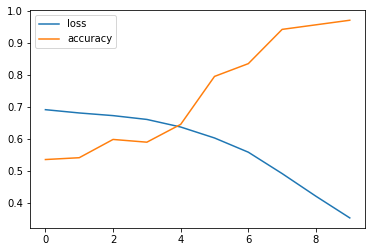

In [7]:
pd.DataFrame(history.history).plot()

In [17]:
import numpy as np
y_pred = model.predict(X_test[[5]])
y_pred, tf.round(y_pred[0]),np.array(y_test[5])

(array([[0.18937668]], dtype=float32),
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 array(0, dtype=int64))

In [12]:
y_test[0:10], X_test[[5]]

(array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64),
 array([[-0.83213572,  0.48709277]]))

In [10]:
cm = tf.math.confusion_matrix(y_test,tf.round(y_pred))
cm

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [300] != values[1].shape = [1] [Op:Pack] name: stack

In [ ]:
tf.math.confusion_matrix([1,0,0,1], [1,1,0,1])